# Age/Net Worth Regression in sklearn

In [1]:
import numpy
import matplotlib
matplotlib.use('agg')
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from class_vis import prettyPicture, output_image

/Users/snewman/Envs/sandbox/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
import random
from sklearn.cross_validation import train_test_split

def ageNetWorthData():
    random.seed(42)
    numpy.random.seed(42)
    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
    ### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)
    return ages_train, ages_test, net_worths_train, net_worths_test

/Users/snewman/Envs/sandbox/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.linear_model import LinearRegression

def studentReg(ages_train, net_worths_train):
    reg = LinearRegression()
    reg.fit(ages_train, net_worths_train)
    return reg

In [5]:
ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()
reg = studentReg(ages_train, net_worths_train)

/Users/snewman/Envs/sandbox/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


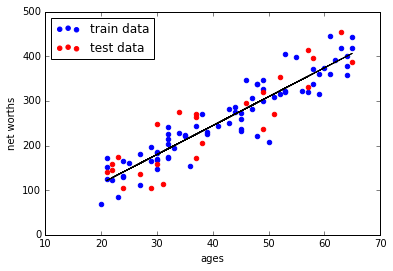

In [7]:
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")
plt.show()

# Extracting Information from sklearn

In [8]:
print 'Katie\'s Net Worth Prediction: ', reg.predict([27])
print 'Slope: ', reg.coef_
print 'Intercept: ', reg.intercept_

Katie's Net Worth Prediction:  [[ 160.43205453]]
Slope:  [[ 6.47354955]]
Intercept:  [-14.35378331]


/Users/snewman/Envs/sandbox/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [9]:
print 'r-squared score (test dataset): ', reg.score(ages_test, net_worths_test)
print 'r-squared score (training dataset): ', reg.score(ages_train, net_worths_train)

r-squared score (test dataset):  0.812365729231
r-squared score (training dataset):  0.874588235822


http://napitupulu-jon.appspot.com/posts/regression-ud.html

# Regression Mini-Project

In [17]:
import sys
import pickle

from sklearn.cross_validation import train_test_split
from feature_format import featureFormat, targetFeatureSplit

dictionary = pickle.load( open('final_project_dataset_modified.pkl', 'r'))
features_list = ['bonus', 'salary']
data = featureFormat(dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(data)

feature_train, feature_test, target_train, target_test = train_test_split(features, \
    target, test_size=0.5, random_state=42)

train_color = 'b'
test_color = 'r'

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

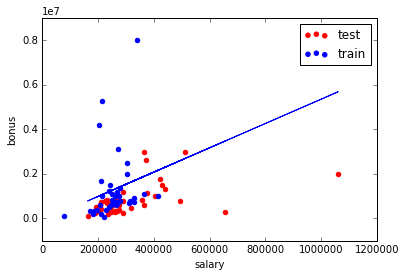

In [19]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt

for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 

for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot(feature_test, reg.predict(feature_test))
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

# Extracting Slope and Intercept

In [20]:
print 'Slope: ', reg.coef_
print 'Intercept: ', reg.intercept_

Slope:  [ 5.44814029]
Intercept:  -102360.543294


# Regression Score: Training Data

In [22]:
reg.score(feature_train, target_train)

0.045509192699524359

# Regression Score: Test Data

In [23]:
reg.score(feature_test, target_test)

-1.4849924173685101

# Regressing Bonus Against LTI

In [24]:
import sys
import pickle

from sklearn.cross_validation import train_test_split
from feature_format import featureFormat, targetFeatureSplit

dictionary = pickle.load( open('final_project_dataset_modified.pkl', 'r'))
features_list = ['bonus', 'long_term_incentive']
data = featureFormat(dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(data)

feature_train, feature_test, target_train, target_test = train_test_split(features, \
    target, test_size=0.5, random_state=42)

train_color = 'b'
test_color = 'r'

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(feature_train, target_train)

reg.score(feature_test, target_test)

-0.59271289994986476

# Sneak Peek: Outliers Break Regressions

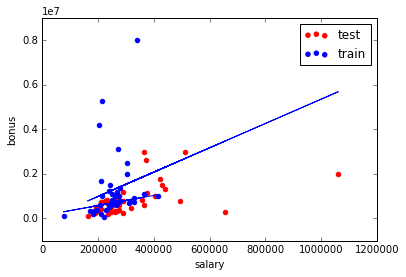

In [26]:
import sys
import pickle

from sklearn.cross_validation import train_test_split
from feature_format import featureFormat, targetFeatureSplit

dictionary = pickle.load( open('final_project_dataset_modified.pkl', 'r'))
features_list = ['bonus', 'salary']
data = featureFormat(dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(data)

feature_train, feature_test, target_train, target_test = train_test_split(features, \
    target, test_size=0.5, random_state=42)

train_color = 'b'
test_color = 'r'

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(feature_train, target_train)

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt

for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 

for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot(feature_test, reg.predict(feature_test))
except NameError:
    pass

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b") 

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()



In [28]:
reg.coef_

array([ 2.27410114])